# ***Traffic sign classification using transfer learning with ResNet152V2***

## **The code runs on kaggle, you can click on this [Link](https://www.kaggle.com/code/tuanai/traffic-sign-classification-resnet152v2-acc-99) to rerun the assignment**

# 1. Data visualization

In [1]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm

### Read train data

In [2]:
train_path = "/kaggle/input/traffic-signs-dataset/DATA"

In [3]:
# Get the names of subfolders in train path
class_folders =  os.listdir(train_path)

image_counts = {}

for class_folder in class_folders:
    path = os.path.join(train_path, class_folder)

    # Count the number of images in the folder
    image_count = len(os.listdir(path))

    # Get the class number from the name directory
    class_number_train = class_folders.index(class_folder)

    # Save the number of images to the dictionary
    image_counts[class_folder] = image_count

### Display quantity chart

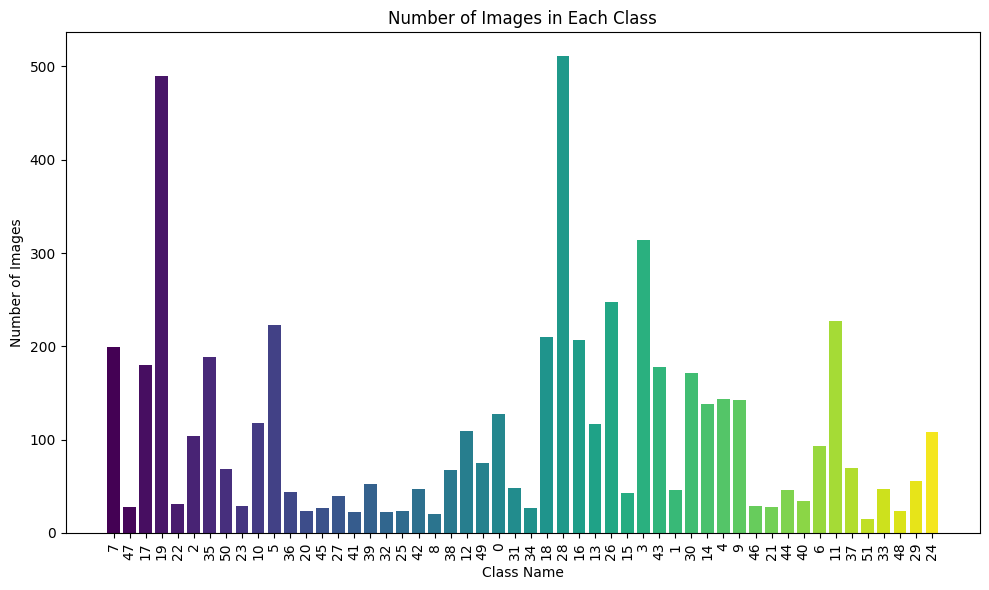

In [4]:
# Choose a color map from the matplotlib library
color_map = cm.viridis

# Create a color array based on the number of photos in each layer
colors = [color_map(i / len(image_counts)) for i in range(len(image_counts))]

# Draw a chart with the created color array
plt.figure(figsize=(10, 6))
bars = plt.bar(image_counts.keys(), image_counts.values(), color=colors)
plt.xlabel('Class Name')
plt.ylabel('Number of Images')
plt.title('Number of Images in Each Class')
plt.xticks(rotation=90)
plt.tight_layout()

plt.show()

### Displays images of traffic signs

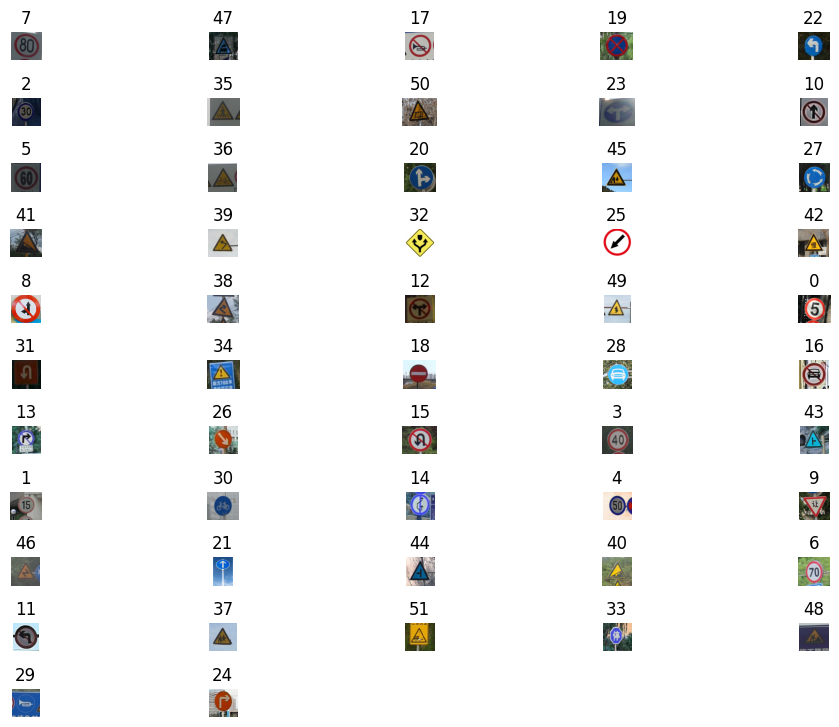

In [5]:

# Set the size of the drawing
plt.figure(figsize=(10, 10))

# Loop through each subfolder
for i, folder in enumerate(class_folders):
    path = os.path.join(train_path, folder)
    
    # Set subplot index
    plt.subplot(15, 5, i+1)
    
    # Loop through each file in the directory
    for j, img in enumerate(os.listdir(path)):
        # Make sure to display only a single image per folder
        if j >= 1:
            break
        
        img_array = cv2.imread(os.path.join(path,img))
        
        # Show image
        plt.imshow(cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB))
        plt.title(folder)
        plt.axis('off')

# Set space between rows and columns
plt.subplots_adjust(hspace=5, wspace=0.5)
plt.tight_layout()
plt.show()


## Read the label file

In [6]:
path_label = '/kaggle/input/traffic-signs-dataset/labels.csv'

df = pd.read_csv(path_label)

In [7]:
df

,ClassId,Name
0,0,Speed limit (5km/h)
1,1,Speed limit (15km/h)
2,2,Speed limit (30km/h)
3,3,Speed limit (40km/h)
4,4,Speed limit (50km/h)
5,5,Speed limit (60km/h)
6,6,Speed limit (70km/h)
7,7,speed limit (80km/h)
8,8,Dont Go straight or left
9,9,Unknown7


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   ClassId  52 non-null     int64 
 1   Name     52 non-null     object
dtypes: int64(1), object(1)
memory usage: 960.0+ bytes


In [9]:
class_label = len(df)

In [10]:
print('The number of labels is : ',class_label)

The number of labels is :  52


# 2. Data augmentation

In [11]:
import tensorflow as tf

2024-04-11 09:04:10.816707: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-11 09:04:10.816812: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-11 09:04:10.997786: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [12]:
train_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255,
                                                                  rotation_range=10,
                                                                  width_shift_range=0.1,
                                                                  height_shift_range=0.1,
                                                                  shear_range=0.15,
                                                                  zoom_range=0.15,
                                                                  horizontal_flip=False,
                                                                  vertical_flip=False,
                                                                  fill_mode='nearest',
                                                                  validation_split=0.2,
                                                                  )

In [13]:
train_images = train_generator.flow_from_directory(train_path,
                                                   target_size=(128, 128),
                                                   class_mode='categorical',
                                                   batch_size=32,
                                                   color_mode='rgb',
                                                   subset='training'
                                                  )

val_images = train_generator.flow_from_directory(train_path,
                                                 target_size=(128, 128),
                                                 class_mode='categorical',
                                                 batch_size=32,
                                                 color_mode='rgb',
                                                 subset='validation'
                                                )

Found 4571 images belonging to 52 classes.
Found 1112 images belonging to 52 classes.


In [14]:
# View the structure of the train_images object
print(train_images.class_indices)

{'0': 0, '1': 1, '10': 2, '11': 3, '12': 4, '13': 5, '14': 6, '15': 7, '16': 8, '17': 9, '18': 10, '19': 11, '2': 12, '20': 13, '21': 14, '22': 15, '23': 16, '24': 17, '25': 18, '26': 19, '27': 20, '28': 21, '29': 22, '3': 23, '30': 24, '31': 25, '32': 26, '33': 27, '34': 28, '35': 29, '36': 30, '37': 31, '38': 32, '39': 33, '4': 34, '40': 35, '41': 36, '42': 37, '43': 38, '44': 39, '45': 40, '46': 41, '47': 42, '48': 43, '49': 44, '5': 45, '50': 46, '51': 47, '6': 48, '7': 49, '8': 50, '9': 51}


# 3. Load the pre-trained model and edit

In [15]:
from tensorflow.keras.models import Model, Sequential

### Pre-trained model

In [16]:
pre_trained_model = tf.keras.applications.ResNet152V2(
                        include_top=False,
                        weights="imagenet",
                        input_shape=(128,128,3),
)

234545216/234545216 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [17]:
pre_trained_model.summary()

Model: "resnet152v2"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 128, 128,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 134, 134,  │          0 │ input_layer[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 64, 64,    │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 66, 66,    │          0 │ conv1_conv[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 32, 32,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_preac… │ (None, 32, 32,    │        256 │ pool1_pool[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_preac… │ (None, 32, 32,    │          0 │ conv2_block1_pre… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 32, 32,    │      4,096 │ conv2_block1_pre… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 32, 32,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 32, 32,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_pad  │ (None, 34, 34,    │          0 │ conv2_block1_1_r… │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 32, 32,    │     36,864 │ conv2_block1_2_p… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 32, 32,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 32, 32,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 32, 32,    │     16,640 │ conv2_block1_pre… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 32, 32,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_out    │ (None, 32, 32,    │          0 │ conv2_block1_0_c

 Total params: 58,331,648 (222.52 MB)

 Trainable params: 58,187,904 (221.97 MB)

 Non-trainable params: 143,744 (561.50 KB)

### **Extract features from pre-trained models**

In [18]:
# You can take other layers for better extraction
base_model = Model(inputs=pre_trained_model.input,
                  outputs=pre_trained_model.get_layer('conv5_block2_out').output)

In [19]:
base_model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 128, 128,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 134, 134,  │          0 │ input_layer[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 64, 64,    │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 66, 66,    │          0 │ conv1_conv[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 32, 32,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_preac… │ (None, 32, 32,    │        256 │ pool1_pool[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_preac… │ (None, 32, 32,    │          0 │ conv2_block1_pre… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 32, 32,    │      4,096 │ conv2_block1_pre… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 32, 32,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 32, 32,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_pad  │ (None, 34, 34,    │          0 │ conv2_block1_1_r… │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 32, 32,    │     36,864 │ conv2_block1_2_p… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 32, 32,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 32, 32,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 32, 32,    │     16,640 │ conv2_block1_pre… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 32, 32,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_out    │ (None, 32, 32,    │          0 │ conv2_block1_0_c

 Total params: 53,852,672 (205.43 MB)

 Trainable params: 53,719,168 (204.92 MB)

 Non-trainable params: 133,504 (521.50 KB)

### Freeze layers

In [20]:
base_model.trainable = False

### Check the model again ( see Non-trainable params )

In [21]:
base_model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 128, 128,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 134, 134,  │          0 │ input_layer[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 64, 64,    │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 66, 66,    │          0 │ conv1_conv[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 32, 32,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_preac… │ (None, 32, 32,    │        256 │ pool1_pool[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_preac… │ (None, 32, 32,    │          0 │ conv2_block1_pre… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 32, 32,    │      4,096 │ conv2_block1_pre… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 32, 32,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 32, 32,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_pad  │ (None, 34, 34,    │          0 │ conv2_block1_1_r… │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 32, 32,    │     36,864 │ conv2_block1_2_p… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 32, 32,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 32, 32,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 32, 32,    │     16,640 │ conv2_block1_pre… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 32, 32,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_out    │ (None, 32, 32,    │          0 │ conv2_block1_0_c

 Total params: 53,852,672 (205.43 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 53,852,672 (205.43 MB)

# 4. Build models

### **Transfer Learning from pre-trained ResNet152V2 model**

In [22]:
from tensorflow.keras.layers import Conv2D, Dropout, MaxPool2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam

### **Build a model combining corresponding class outputs**

In [23]:
model = tf.keras.models.Sequential([
    base_model,
    Conv2D(32,(3,3), activation='relu'),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(128, activation='relu'),
    Dense(class_label, activation='softmax')
])

In [44]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ functional_1 (Functional)       │ (None, 4, 4, 2048)     │    53,852,672 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 2, 2, 32)       │       589,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │        66,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 52)             │         6,708 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 56,037,502 (213.77 MB)

 Trainable params: 728,276 (2.78 MB)

 Non-trainable params: 53,852,672 (205.43 MB)

 Optimizer params: 1,456,554 (5.56 MB)

In [24]:
# Define a Callback class that stops training once accuracy reaches 99.9%
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.99):
      print("\nReached 99.9% accuracy so cancelling training!")
      self.model.stop_training = True

In [25]:
optimizer = Adam(learning_rate=0.0001,  # Learning speed
                beta_1=0.9,             # Beta coefficient1
                beta_2=0.999,           # Beta coefficient2
                )
    

In [26]:
model.compile(optimizer=optimizer,
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [27]:
callbacks =myCallback()

In [28]:
print('----------------------------Model is being built......................\n')
history = model.fit(train_images,
                    epochs=50,
                    validation_data=val_images,
                    verbose=1,
                    callbacks = [callbacks]
                   )
print('\n----------------------------Model completed......................\n')

----------------------------Model is being built......................

Epoch 1/50


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


  1/143 ━━━━━━━━━━━━━━━━━━━━ 1:24:48 36s/step - accuracy: 0.0000e+00 - loss: 3.9674

I0000 00:00:1712826307.091925     106 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1712826307.192700     106 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


 19/143 ━━━━━━━━━━━━━━━━━━━━ 2:00 968ms/step - accuracy: 0.0591 - loss: 3.8329

W0000 00:00:1712826324.454342     108 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


143/143 ━━━━━━━━━━━━━━━━━━━━ 119s 584ms/step - accuracy: 0.1995 - loss: 3.2816 - val_accuracy: 0.5468 - val_loss: 1.8973
Epoch 2/50
143/143 ━━━━━━━━━━━━━━━━━━━━ 40s 270ms/step - accuracy: 0.6439 - loss: 1.5596 - val_accuracy: 0.7113 - val_loss: 1.1659
Epoch 3/50
143/143 ━━━━━━━━━━━━━━━━━━━━ 38s 257ms/step - accuracy: 0.7568 - loss: 0.9898 - val_accuracy: 0.7500 - val_loss: 0.9009
Epoch 4/50
143/143 ━━━━━━━━━━━━━━━━━━━━ 40s 270ms/step - accuracy: 0.8229 - loss: 0.6797 - val_accuracy: 0.8112 - val_loss: 0.7012
Epoch 5/50
143/143 ━━━━━━━━━━━━━━━━━━━━ 39s 265ms/step - accuracy: 0.8487 - loss: 0.5497 - val_accuracy: 0.8399 - val_loss: 0.5789
Epoch 6/50
143/143 ━━━━━━━━━━━━━━━━━━━━ 38s 259ms/step - accuracy: 0.8857 - loss: 0.4397 - val_accuracy: 0.8579 - val_loss: 0.5119
Epoch 7/50
143/143 ━━━━━━━━━━━━━━━━━━━━ 39s 263ms/step - accuracy: 0.9114 - loss: 0.3580 - val_accuracy: 0.9002 - val_loss: 0.3969
Epoch 8/50
143/143 ━━━━━━━━━━━━━━━━━━━━ 41s 277ms/step - accuracy: 0.9173 - loss: 0.3143 - va

# 5. Result

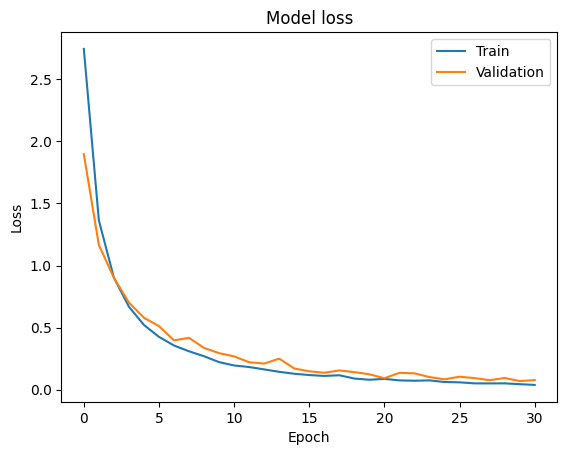

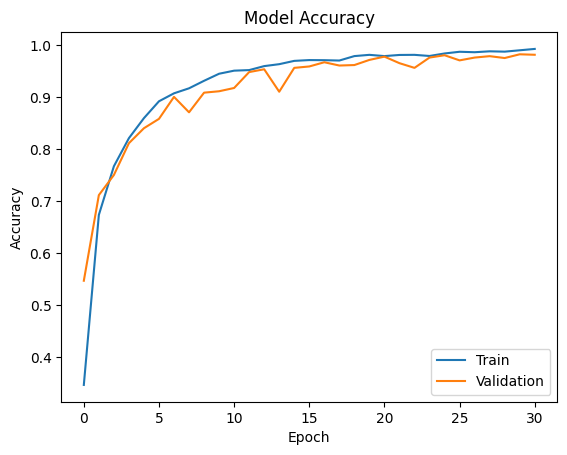

In [29]:
# Plot the loss of training and validation
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()


# Plot the accuracy of training and validation
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

# 6. Test the model with real data

### **Create test data set**

In [30]:
directory_test = "/kaggle/input/traffic-signs-dataset/TEST"

In [31]:
class_name_test = os.listdir(directory_test)

test_arrays = []

for class_number_train, class_name in enumerate(class_name_test):
    path = os.path.join(directory_test, class_name)
    for img in os.listdir(path):
        # Đọc ảnh
        img_array = cv2.imread(os.path.join(path, img))
        img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
        img_array = cv2.resize(img_array, (128, 128))

        test_arrays.append([img_array, class_name])


In [32]:
print('Number of test data : ', len(test_arrays))

Number of test data :  433


In [33]:
X_train=[]
Y_train=[]
for features,label in test_arrays:
    X_train.append(features)
    Y_train.append(label)
X_train=np.array(X_train)

In [34]:
X_train=X_train /255.0

NameID :  7


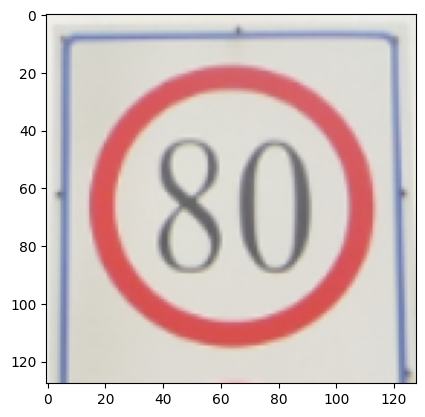

In [35]:
print('NameID : ',Y_train[0])
plt.imshow(X_train[0])

In [36]:
from sklearn.preprocessing import LabelBinarizer

In [37]:
#Converted our labels to one-hot-encoding values. Ex : 1 ----->[0,1,0,0,0,0,0,0,0,0]
lb = LabelBinarizer()

In [38]:
Y_train= lb.fit_transform(Y_train)

### **Predict test data**

In [39]:
model.predict(X_train)

14/14 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step


array([[8.9320196e-07, 3.0414021e-05, 2.1567354e-08, ..., 8.6398417e-01,
        8.3205492e-07, 3.9625957e-07],
       [8.0482041e-06, 6.2241877e-04, 1.2910987e-05, ..., 5.4437596e-01,
        1.8576100e-07, 1.8647978e-06],
       [3.3365935e-11, 9.0435837e-10, 6.5870493e-14, ..., 9.9948120e-01,
        1.3854717e-14, 1.7344702e-13],
       ...,
       [2.9721964e-04, 1.4927093e-06, 9.9964004e-10, ..., 7.9291765e-13,
        5.4760966e-12, 2.6668457e-07],
       [2.2309763e-02, 5.5123172e-03, 8.6289242e-07, ..., 1.2764202e-07,
        4.1813030e-07, 1.8174814e-04],
       [7.5732173e-06, 8.3904300e-04, 1.9617416e-06, ..., 1.0094776e-09,
        2.1999180e-03, 1.5500647e-05]], dtype=float32)

In [43]:
from sklearn.metrics import classification_report

# Make predictions
predictions = model.predict(X_train)

# Convert predictions to class labels
predicted_classes = np.argmax(predictions, axis=1)

# Get true labels
true_classes = np.argmax(Y_train, axis=1)

# Get class labels
class_labels = class_name_test

# Generate classification report
report = classification_report(true_classes, predicted_classes, target_names=class_labels)# Giả sử y_true và y_pred là nhãn thực và nhãn dự đoán của bạn, tương ứng

print(report)


14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step
              precision    recall  f1-score   support

           7       1.00      1.00      1.00         4
          47       1.00      0.67      0.80         6
          17       1.00      1.00      1.00        12
          19       1.00      1.00      1.00        22
          22       0.82      1.00      0.90         9
           2       0.92      1.00      0.96        11
          35       1.00      1.00      1.00         2
          50       1.00      0.93      0.97        15
          23       1.00      1.00      1.00        11
          10       1.00      1.00      1.00        14
           5       1.00      0.80      0.89        10
          36       1.00      1.00      1.00        10
          20       1.00      1.00      1.00        10
          45       1.00      1.00      1.00         2
          27       0.67      0.50      0.57         8
          41       1.00      1.00      1.00         5
          39       1.00      0.43      0.